In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd

np.random.seed(1234)
%matplotlib inline

Пример формирования генеральной совокупности с нормальным распределением.

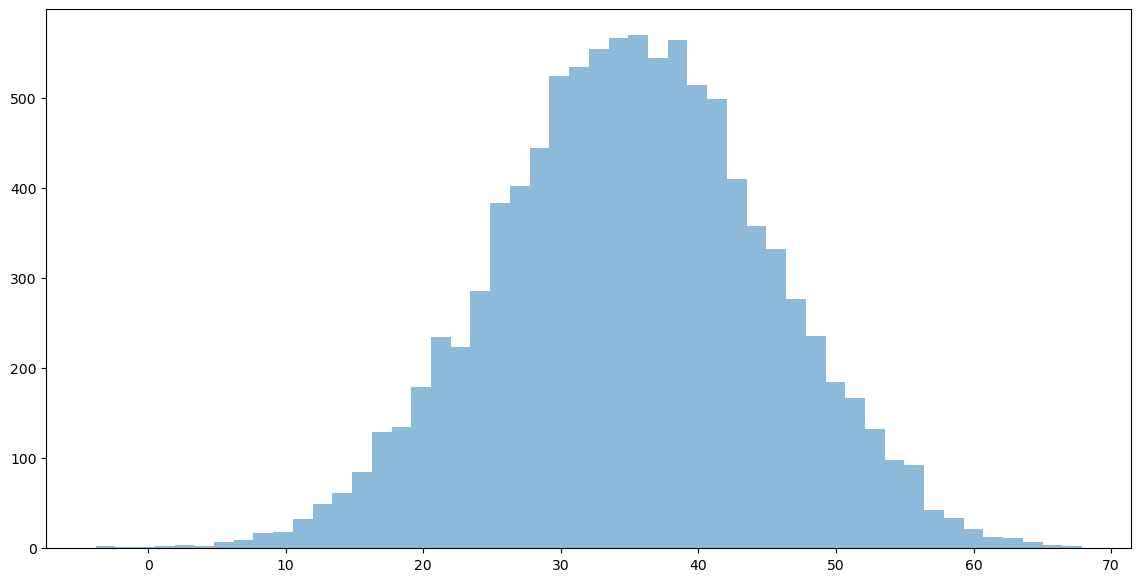

In [4]:
norm_rvl = stats.norm(loc=35, scale=10)
# scale - стандартное отклонение
# loc - среднее

# генерируем случайные числа из распредения norm_rvl
gen_pop = norm_rvl.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
axl = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.5)
plt.show()

Также рассмотрим пример с логнормальным распределением.

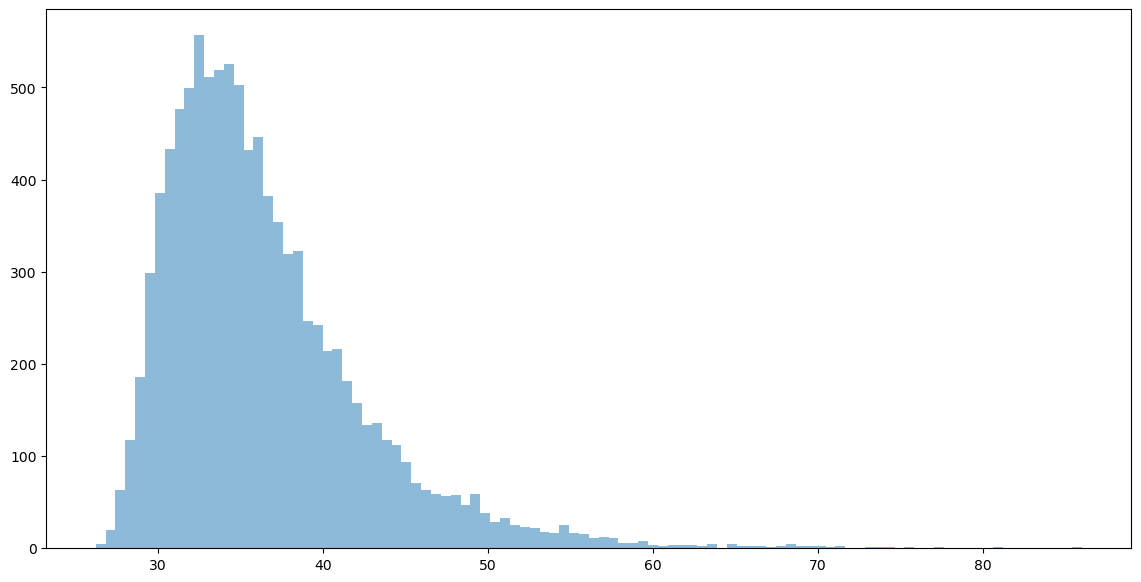

In [18]:
ln_distrib = stats.lognorm(0.5, loc=25, scale=10)
gen_pop_ln = ln_distrib.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
axl = plt.subplot(111)
plt.hist(gen_pop_ln, 100, alpha=0.5)
plt.show()

Это будут два наших теоретических распределения генеральных совокупностей (в реальной жизни обычно к ним у нас доступа не бывает), которые будем использовать далее в лекции.

## Описательная статистика

### Меры концентрации

**Медиана** - это такое число выборки, что ровно половина из элементов выборки больше него, а другая половина меньше него.

In [19]:
median = np.median(gen_pop)
median_ln = np.median(gen_pop_ln)

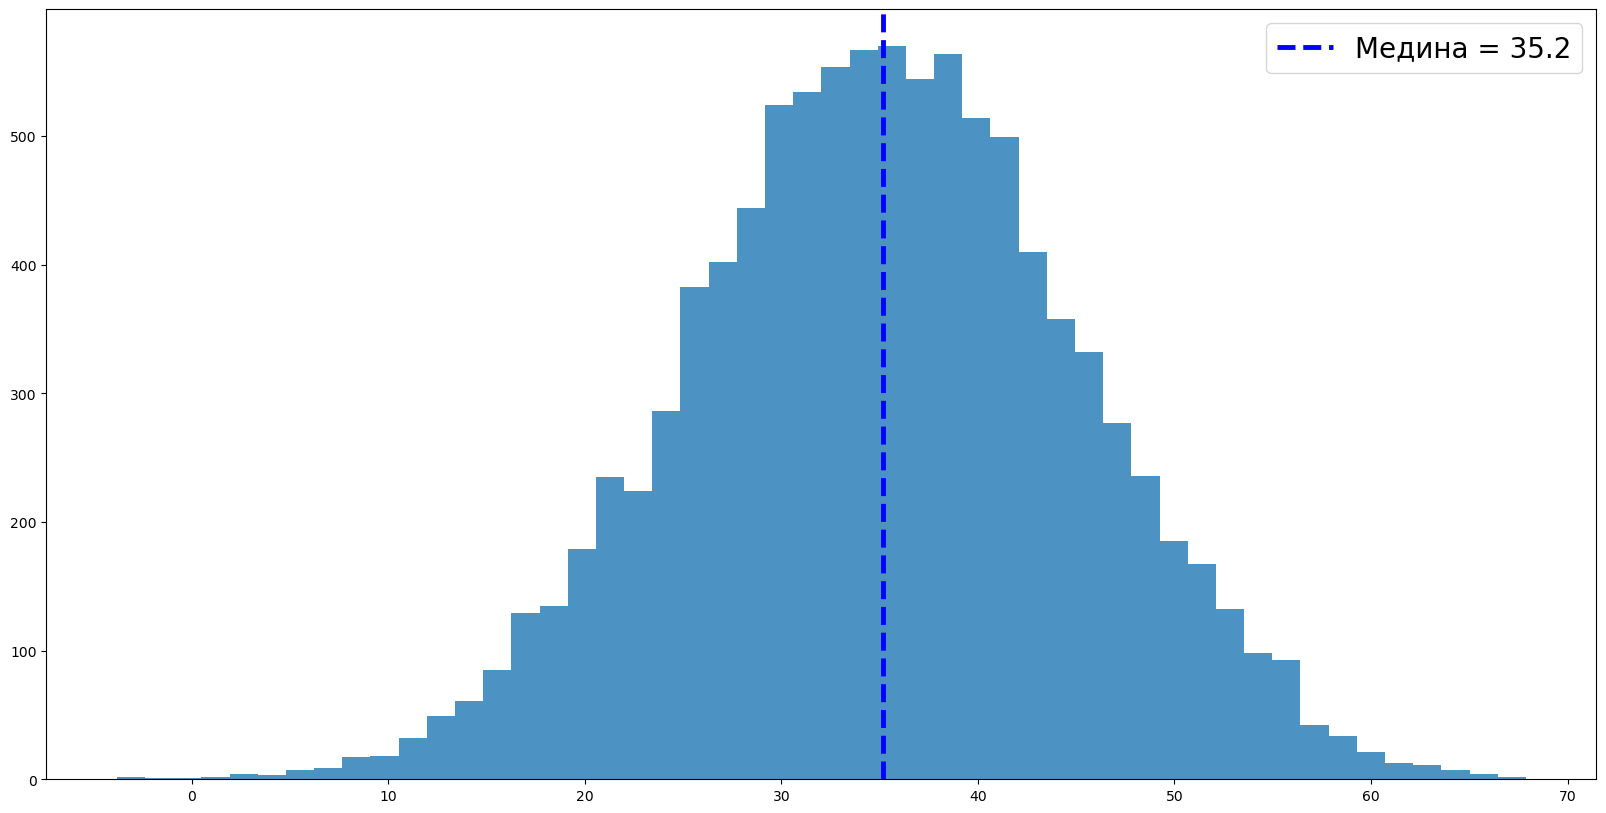

In [20]:
fig = plt.figure(figsize=(20, 10))

axl = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.8)
line1 = plt.axvline(median, label=('Медина = ' + str(round(median, 1))),
                    color='blue', linestyle='dashed', linewidth=3.5)

axl.legend(handles=[line1], fontsize=20)
plt.show()

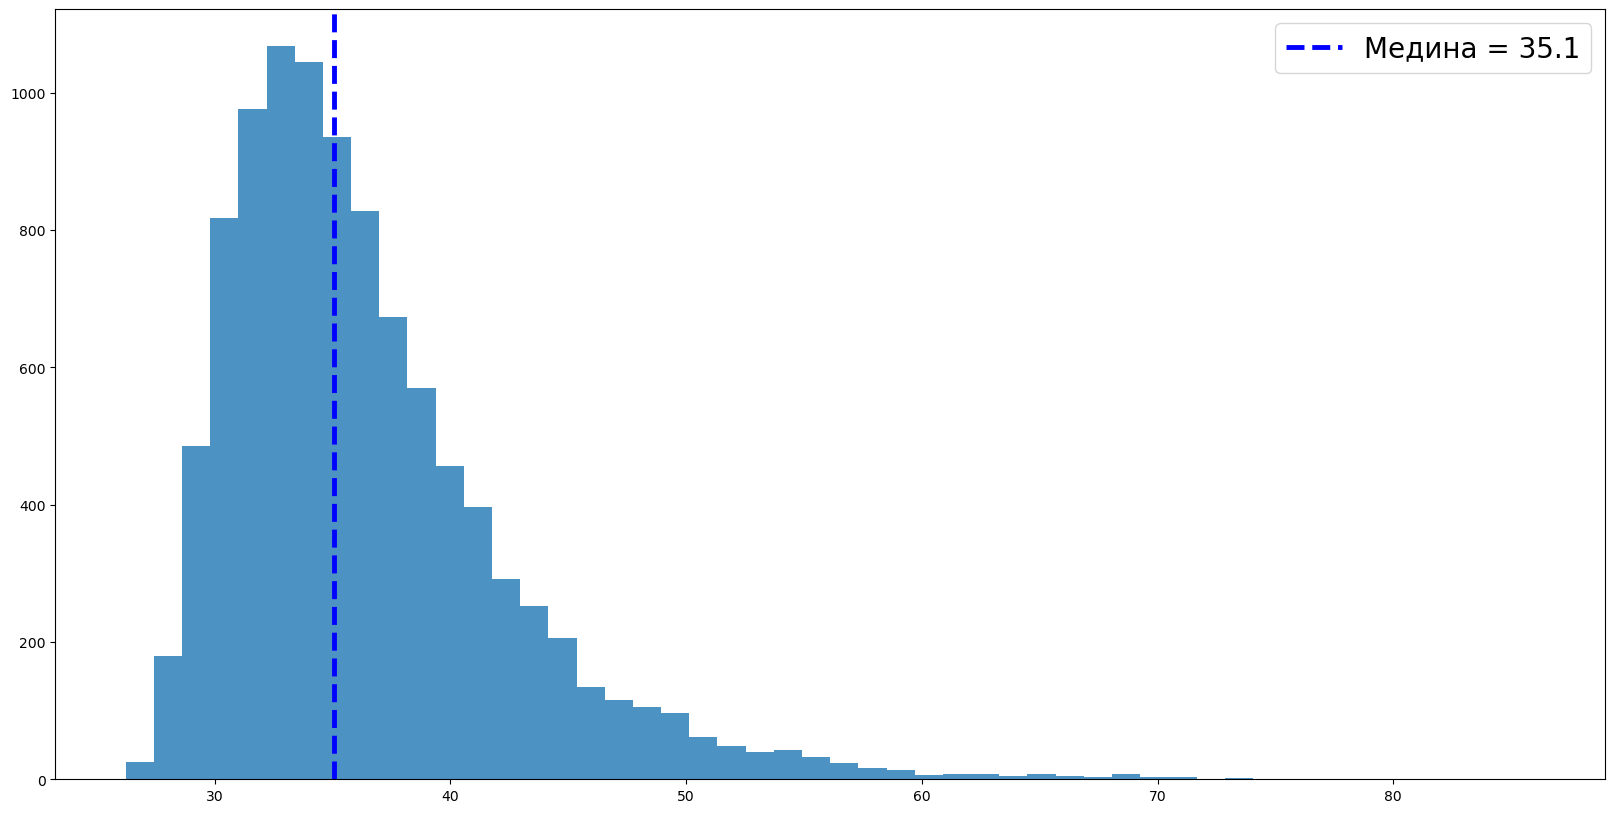

In [21]:
fig = plt.figure(figsize=(20, 10))

axl = plt.subplot(111)
plt.hist(gen_pop_ln, 50, alpha=0.8)
line1 = plt.axvline(median_ln, label=('Медина = ' + str(round(median_ln, 1))),
                    color='blue', linestyle='dashed', linewidth=3.5)

axl.legend(handles=[line1], fontsize=20)
plt.show()

In [5]:
dscrt_lst = np.random.randint(0, 100, size = 1000)

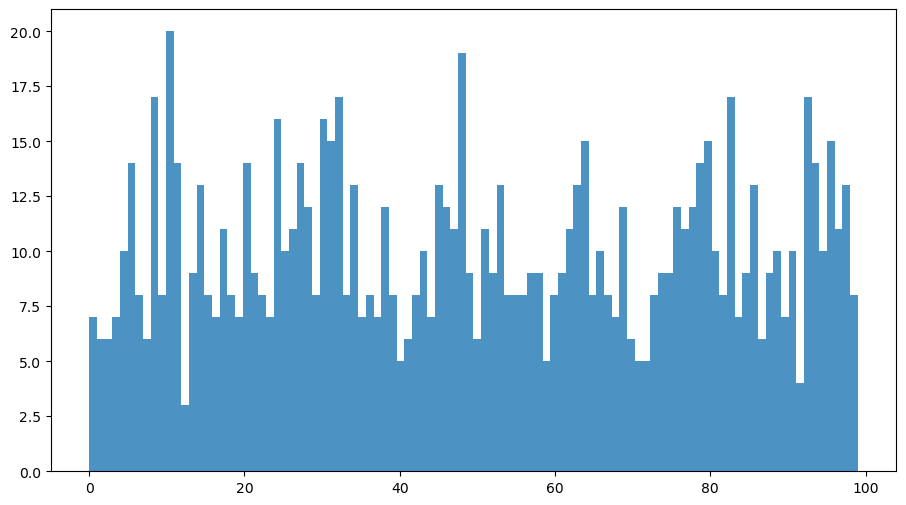

In [17]:
fig = plt.figure(figsize=(24, 6))

axl = plt.subplot(121)
plt.hist(dscrt_lst, 100, alpha = 0.8)
plt.show()

**Мода** - значение во множестве наблюдений, которое встречается наиболее часто.

In [26]:
dscrt_lst = np.random.randint(0, 100, size=1000)

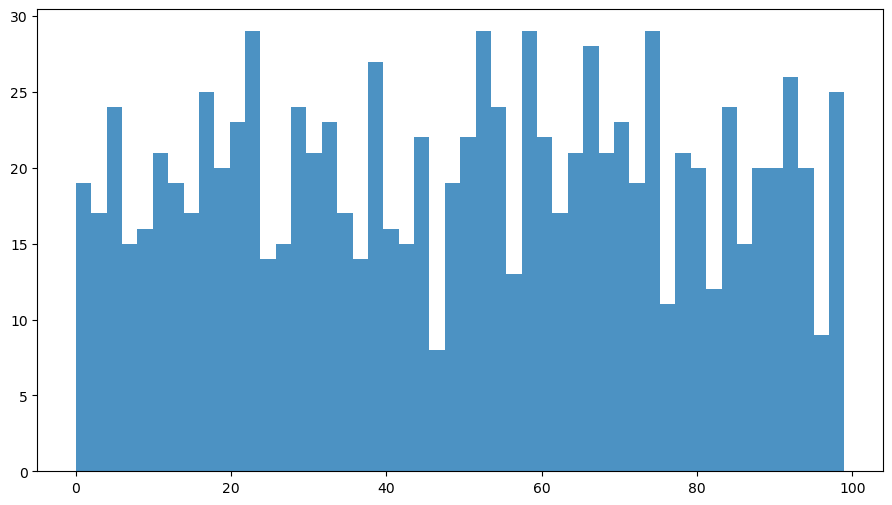

In [27]:
fig = plt.figure(figsize=(24, 6))

axl = plt.subplot(121)
plt.hist(dscrt_lst, 50, alpha=0.8)
plt.show()

In [28]:
mode = stats.mode(dscrt_lst)
mode

ModeResult(mode=33, count=18)

**Квантиль** - значение, которое заданная случайно величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем.

In [22]:
np.percentile(gen_pop, 75)

41.836611373999276

In [23]:
stats.scoreatpercentile(gen_pop, 75)

41.836611373999276

In [24]:
df_box_plot = pd.DataFrame()
df_box_plot['gen_pop'] = gen_pop
df_box_plot['gen_pop_ln'] = gen_pop_ln

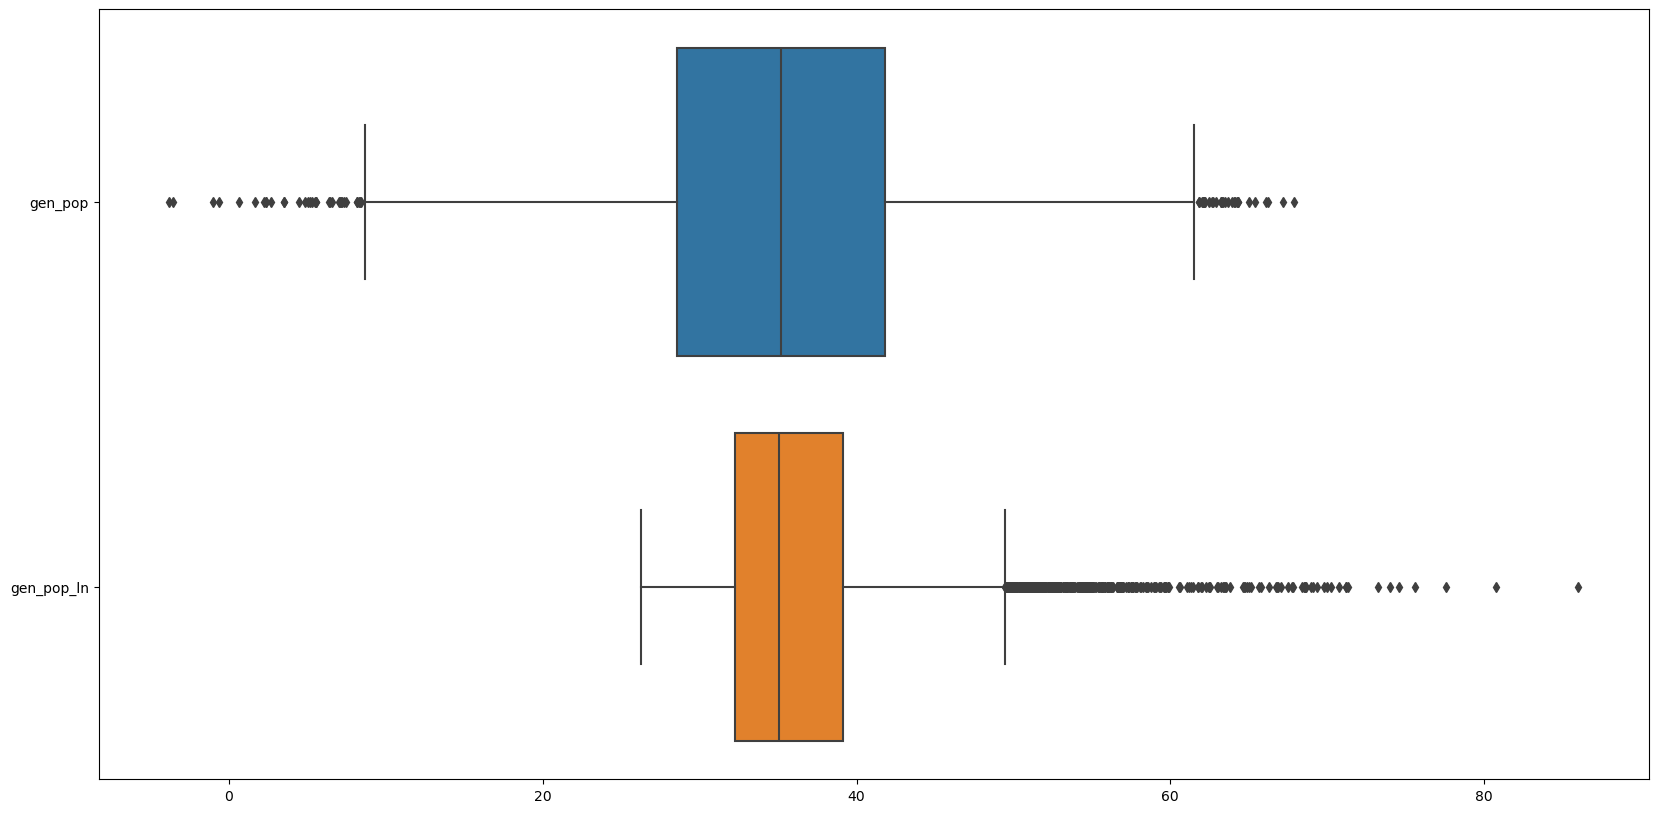

In [25]:
fig = plt.figure(figsize=(20, 10))
sns.boxplot(df_box_plot, orient='h')
plt.show()

### Среднее арифметическое

При работе с генеральной совокупностю данных:

среднее - $\mu = \frac {1} {N} \sum_{i=1} ^{N} (x_{i})$, N - объём генеральной совокупности.

In [26]:
mean = np.mean(gen_pop)
mean

35.16126460047198

При работе с выборкой меры концентрации начинают называться **выборочными**, потому что оценку ***меры*** мы производим **по выборке**.

выборочное среднее - $\overline{X} = \frac {1} {n} \sum_{i=1} ^{n} (x_{i})$, здесь n - объём выборки.

In [6]:
n = 20
sample = np.random.choice(gen_pop, n, replace=False)

In [40]:
sample_mean = np.mean(sample)
sample_mean

34.84443658305648

### Меры разброса

Для генеральной совокупности данных:

дисперсия - $\sigma^{2} = \frac {1} {N} \sum_{i=1} ^{N} (x_{i} - \mu)^{2}$

среднеквадратическое отклонение - $\sigma = \sqrt{\frac {1} {N} \sum_{i=1} ^{N} (x_{i} - \mu)^{2}}$

In [10]:
# дисперсия
var_ = np.var(gen_pop)
# среднеквадратичное отклонение
std_ = np.std(gen_pop)

In [44]:
std_

10.075915807375459

Оценка среднеквадратическоого отклонения через **выборочное среднеквадратическое отклонение**:

$S = \sqrt{\frac {1} {n-1} \sum_{i=1} ^{n} (x_{i} - \overline{X})^{2}}$

По интуиции - разброс значений в пределах выборки никогда не быввает столько большим, как во всей совокупности, и деление не на n, а на n - 1 компенсирует возникающее занижение оценки стандартного отклонения

In [7]:
std_sample = np.std(sample, ddof=1)
std_sample

11.79494444753478

In [8]:
iterations = 1000
n = 20

std_sample_l = []
std_sample_l_corrected = []

for i in range(iterations):
    sample = np.random.choice(gen_pop, n, replace=False)
    std_sample = np.std(sample)
    std_sample_corrected = np.std(sample, ddof=1)

    std_sample_l.append(std_sample)
    std_sample_l_corrected.append(std_sample_corrected)

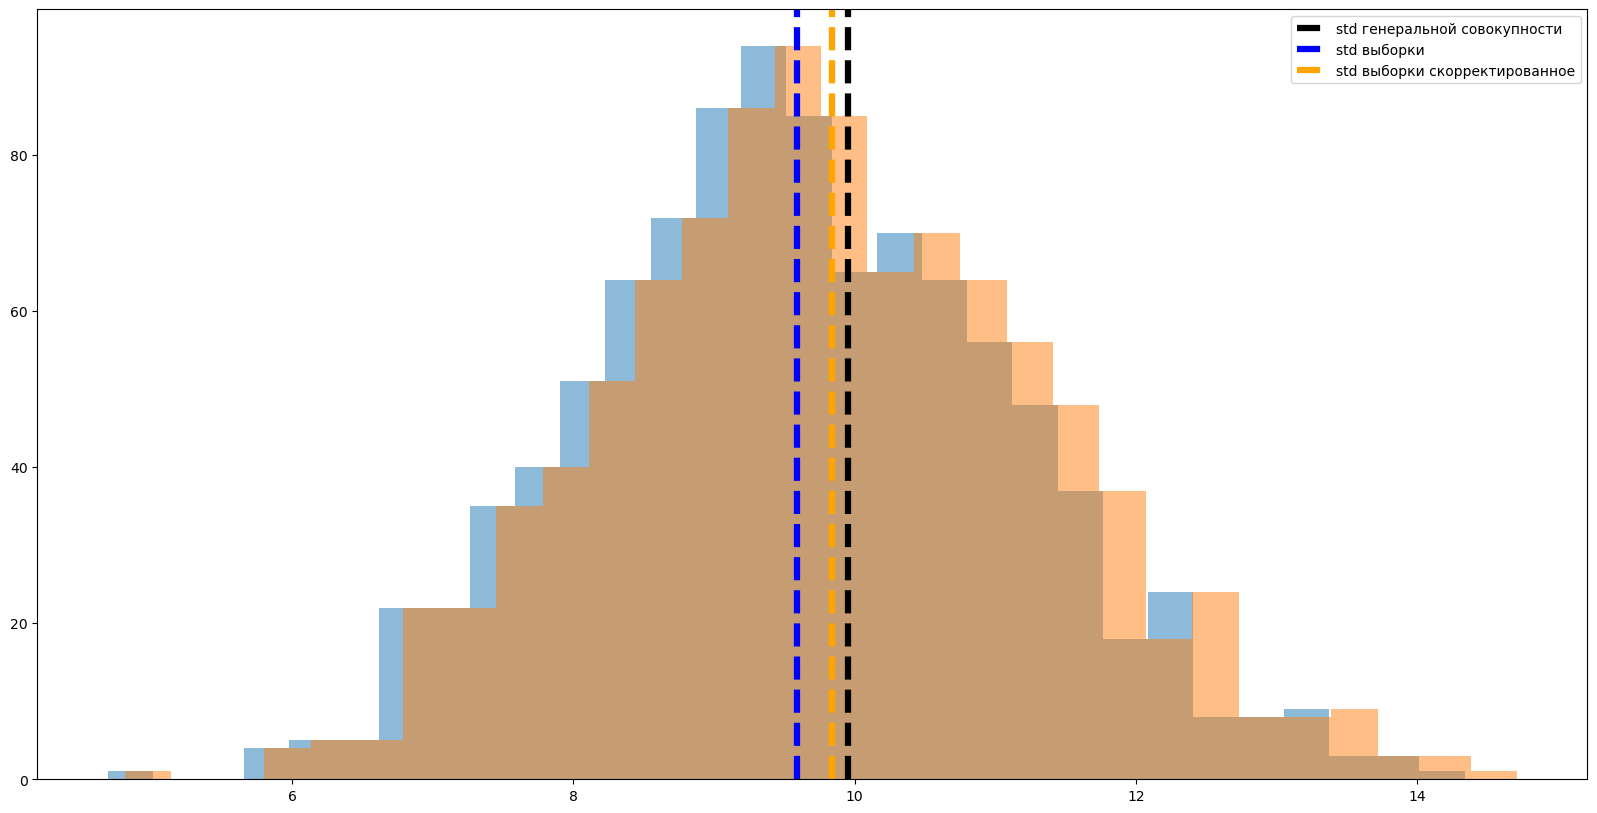

In [12]:
fig = plt.figure(figsize=(20, 10))

axl = plt.subplot(111)
plt.hist(std_sample_l, alpha=0.5, bins=30)
plt.hist(std_sample_l_corrected, alpha=0.5, bins=30)

line1 = plt.axvline(std_, color='black', linestyle='dashed', linewidth=4.5,
                    label = 'std генеральной совокупности')
line2 = plt.axvline(np.mean(std_sample_l), color='blue', linestyle='dashed', linewidth=4.5,
                    label = 'std выборки')
line3 = plt.axvline(np.mean(std_sample_l_corrected), color='orange', linestyle='dashed', linewidth=4.5,
                    label = 'std выборки скорректированное')

plt.legend()
plt.show()

**Стандартная ошибка среднего** в математической статистике - величина, характеризующая стандартное отклонение выборочного среднего, рассчитанное по выборке размера n из генеральной совокупности.

истинная стандартная ошибка - $\sigma_{\overline{X}} = \frac {\sigma} {\sqrt{N}}$

оценка стадартной ошибки по выборке - $S_{\overline{X}} = \frac {S} {\sqrt{n}}$

In [14]:
n = 20
sample = np.random.choice(gen_pop, n, replace=False)
# оценка стандартной ошибки  по выборкеab
stats.sem(sample)

1.4267987759925105

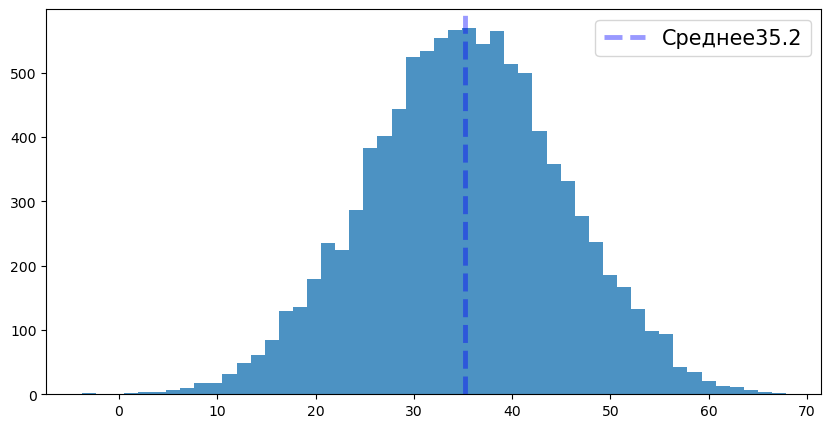

In [27]:
fig = plt.figure(figsize=(10, 5))

axl = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.8)
line1 = plt.axvline(mean, label=('Среднее' + str(round(mean, 1))),
                    color='blue', linestyle='dashed', linewidth=3.5, alpha=0.4)
axl.legend(handles=[line1], fontsize=15)
plt.show()

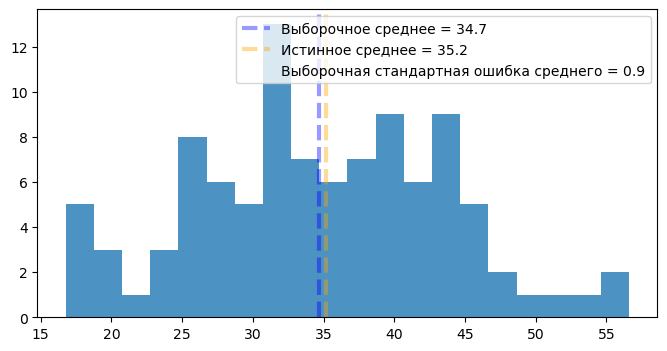

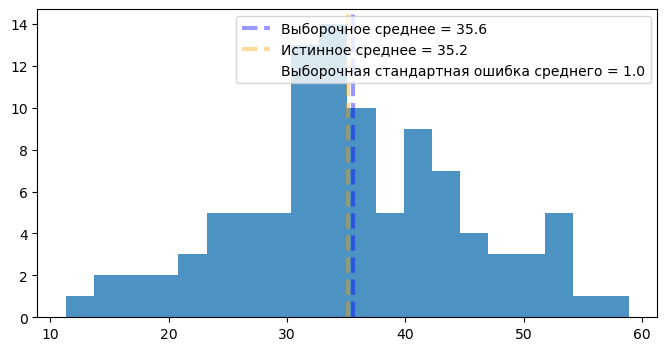

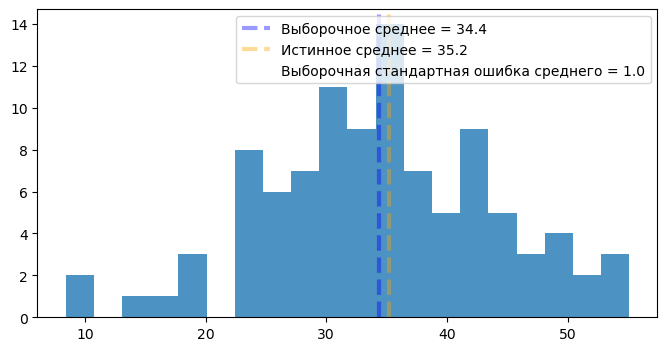

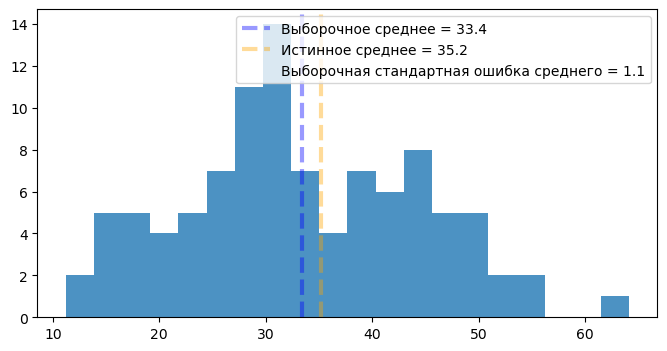

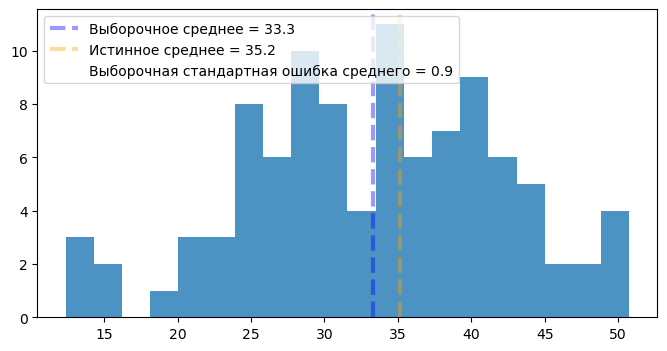

In [30]:
n = 100
for i in range(5):
    sample = np.random.choice(gen_pop, n, replace=False)
    sample_mean = np.mean(sample)
    sem = stats.sem(sample)
    fig = plt.figure(figsize=(8, 4))

    axl = plt.subplot(111)
    plt.hist(sample, 20, alpha=0.8)
    line1 = plt.axvline(sample_mean, label=('Выборочное среднее = ' + str(round(sample_mean, 1))), 
                        color='blue', linestyle='dashed', linewidth=3, alpha=0.4)
    line2 = plt.axvline(mean, label=('Истинное среднее = ' + str(round(mean, 1))), 
                        color='orange', linestyle='dashed', linewidth=3, alpha=0.4)
    line3 = plt.axvline(mean, label=('Выборочная стандартная ошибка среднего = ' + str(round(sem, 1))), 
                        color='black', linestyle='dashed', linewidth=3, alpha=0.0)
    axl.legend(handles=[line1, line2, line3], fontsize=10)
    plt.show()

Чем больше выборка, тем точнее оценка среднегго и тем меньше его стандартная ошибка. Чем больше изменчивость совокупности, тем больше изменчивость выборочных средних, поэтому стандартная ошибка среднего возрастает с увеличением стандартного отклонения совокупности.

**В отличие от стандартного отклонения стандартная ошибка среднего ничего не говорит о разбросе данных, - она лишь показывает точность выборочной оценки среднего.**

### Свойства статистических оценок

Оценка называется **несмещённой**, если её математическое ожидание равно истинному значению оцениваемого параметра.

Более слабым условием является **асимптотическая несмещённость**, которая означает, что математическое ожидание оценки сходится к истинному значению параметра с ростом объёма выборки.

Будем использовать генеральную совокупность со средним.

In [32]:
iterations = 5000
n = 20

std_sample_l = []
std_sample_l_corrected = []

est = []
est_l = []

for i in range(iterations):
    sample = np.random.choice(gen_pop, n, replace=False)
    std_sample = np.std(sample)
    std_sample_corrected = np.std(sample, ddof=1)

    std_sample_l.append(std_sample)
    std_sample_l_corrected.append(std_sample_corrected)

    if i % 20 == 0:
        est.append(np.abs(np.mean(std_sample_l) - std_))
        est_l.append(np.abs(np.mean(std_sample_l_corrected) - std_))

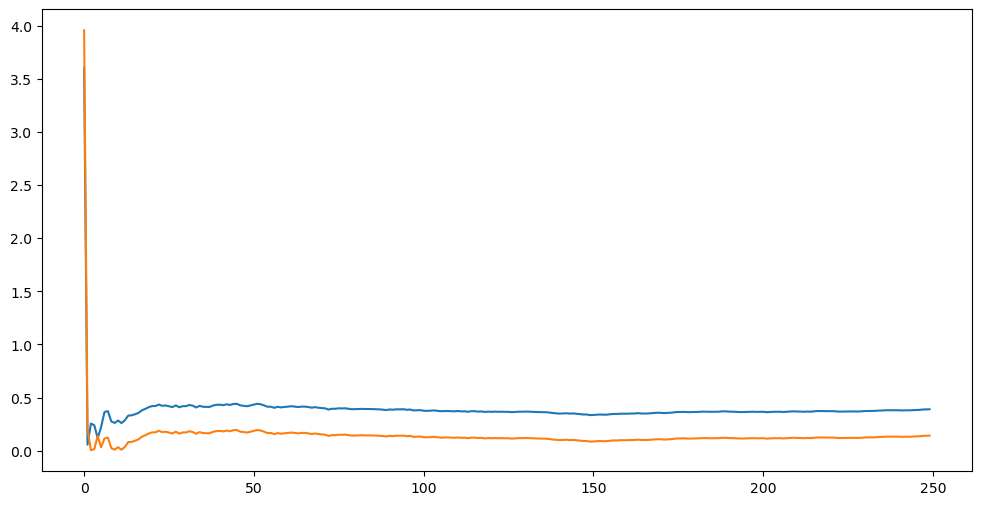

In [33]:
fig = plt.figure(figsize=(12, 6))
plt.plot(est)
plt.plot(est_l)
plt.show()

**Состоятельность** - при бесконечном расширении выборки оценка приходит к истинному значению.

In [34]:
est = []
for i in range(10, 5000, 10):
    sample = np.mean(np.random.choice(gen_pop, i, replace=False))
    est.append(sample)

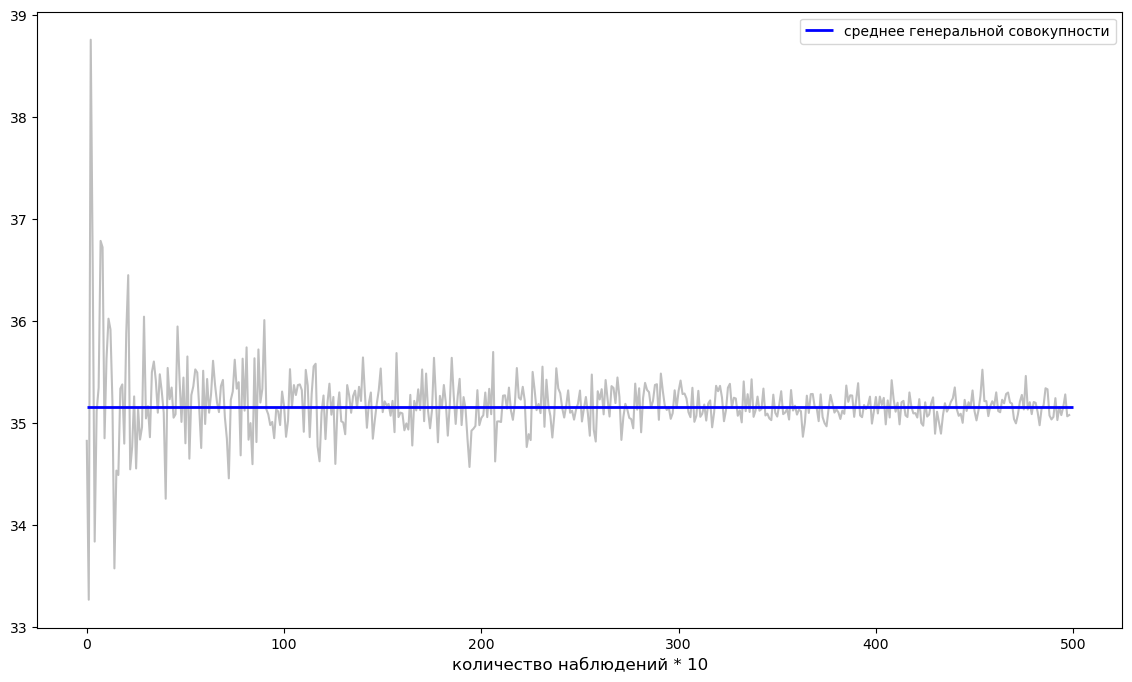

In [35]:
plt.figure(figsize=(14, 8))
plt.plot(est, c='grey', alpha=0.5)
plt.hlines(mean, 0, 500, color='blue', lw=2, label='среднее генеральной совокупности')
plt.xlabel('количество наблюдений * 10', size=12)
plt.legend()
plt.show()

Пример несостоятельной оценки:

In [36]:
est = []
for i in range(10, 5000, 10):
    sample = np.mean(np.random.choice(gen_pop, i, replace=False)) * (np.sqrt(i) / i) + 30
    est.append(sample)

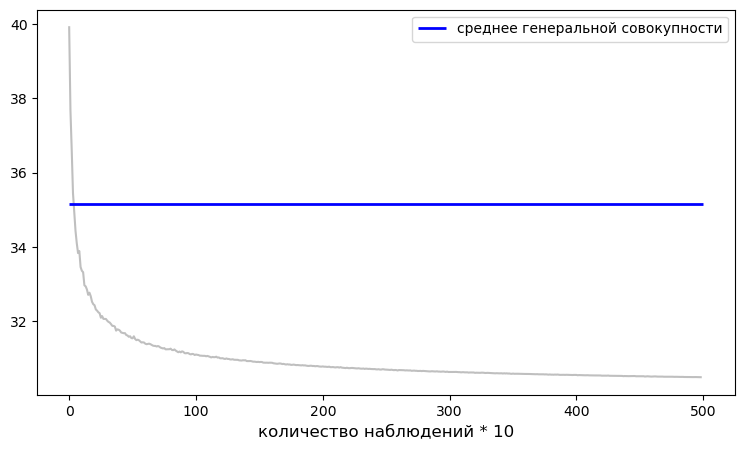

In [37]:
plt.figure(figsize=(9, 5))
plt.plot(est, c='grey', alpha=0.5)
plt.hlines(mean, 0, 500, color='blue', lw=2, label='среднее генеральной совокупности')
plt.xlabel('количество наблюдений * 10', size=12)
plt.legend()
plt.show()

Несмещенная оценка называется **эффективной** среди рассматриваемых оценок, если она имеет минимальную дсиперсию.

Опять будем оценивать среднее генеральной совокупности по выборке:

$\hat{\theta}_{1} = \frac {1} {n} \sum_{i=1} ^{n} x_{i}$

$\hat{\theta}_{2} = Me(x_{i})$

In [39]:
n = 20
est_1 = []
est_2 = []

for i in range(1000):
    est_1.append(np.mean(np.random.choice(gen_pop, n, replace=False)))
    est_2.append(np.median(np.random.choice(gen_pop, n, replace=False)))

df_box_plot_est = pd.DataFrame()
df_box_plot_est['est_1'] = est_1
df_box_plot_est['est_2'] = est_2

<function matplotlib.pyplot.show(close=None, block=None)>

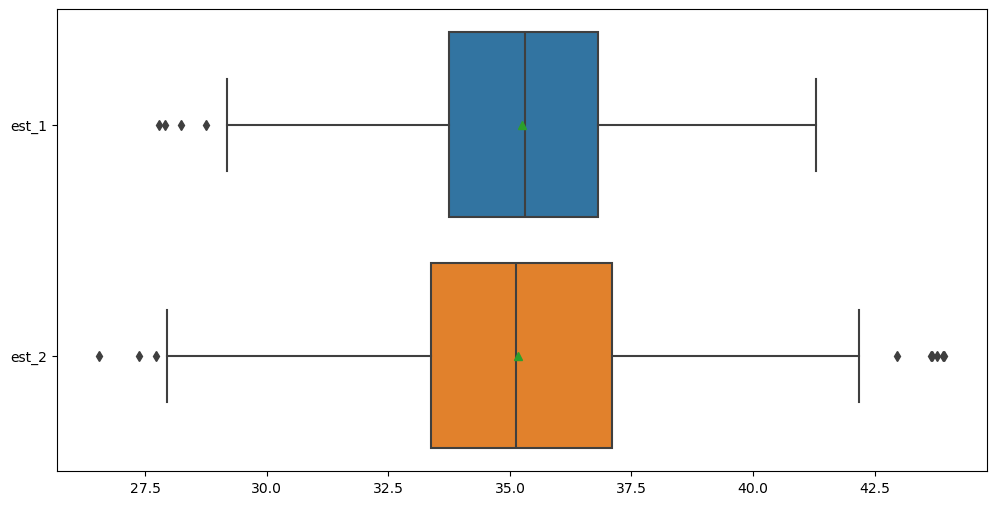

In [40]:
fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box_plot_est, orient='h', showmeans=True)
plt.show

In [41]:
mean_1 = np.mean(est_1)
mean_2 = np.mean(est_2)

print(f'Среднее по выборкам оценки 1 - {round(mean_1, 1)}')
print(f'Среднее по выборкам оценки 2 - {round(mean_2, 1)}')

var_1 = np.var(est_1)
var_2 = np.var(est_2)

print(f'Дисперсия по выборкам оценки 1 - {round(var_1, 1)}')
print(f'Дисперсия по выборкам оценки 2 - {round(var_2, 1)}')

Среднее по выборкам оценки 1 - 35.3
Среднее по выборкам оценки 2 - 35.2
Дисперсия по выборкам оценки 1 - 5.2
Дисперсия по выборкам оценки 2 - 7.7


Обе оценки состоятельны и несмещённые, при этом оценка среднего генеральной совокупности через среднее является эффективной оценкой, так как дисперсия первой оценки меньше.

При этом, если требуется сравнить оценки, которые не обязательно являются несмещёнными, то вычисляют величину MSE (среднеквадратическую ошибку). Эффективной в этом случае называют ту оценку, у которой эта величина минимальна.

$M \space S \space E = \frac {\sum_{i=1} ^{n}(\hat{\theta} - \theta) ^{2}} {n}$

Для несмещённых оценок она совпадает с дисперсией.

### Эмпирические функции распределения cdf и pdf

Для работы с оценкой статистических критериев используют ряд функций:
* pdf - функция плотности вероятности - показывает вероятность распределения случайно величины;
* cdf - это кумулятивная функция распределения, даёт интегральную картину распределния вероятности, задаёт вопрос: "Какова вероятность того, что результат окажется меньше или равен такому-то?".

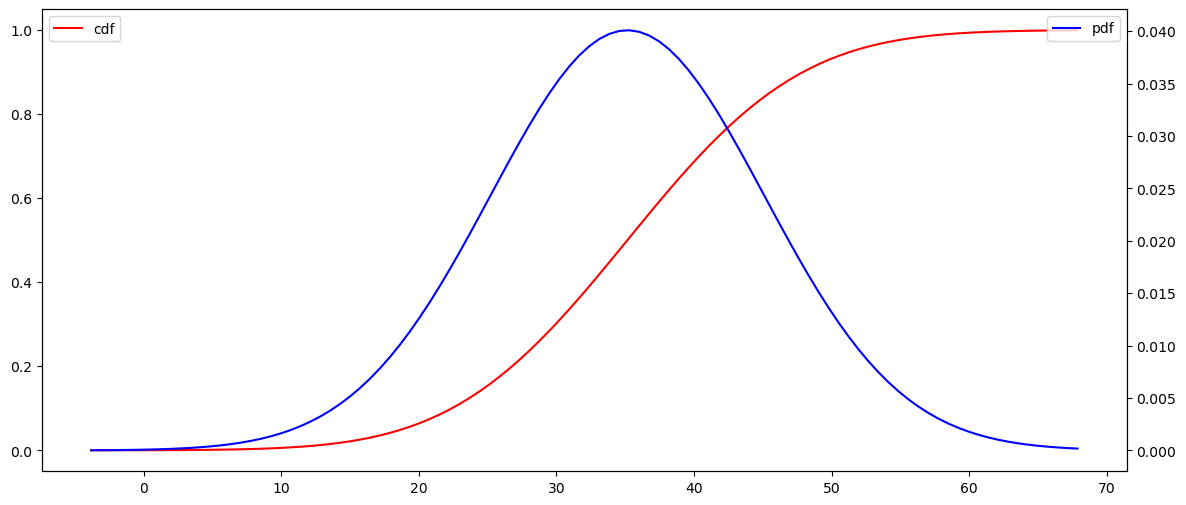

In [43]:
fig = plt.figure(figsize=(14, 6))
x = np.linspace(gen_pop.min(), gen_pop.max(), 100)
mu = gen_pop.mean()
sigma = gen_pop.std()
y_pdf = stats.norm.pdf(x, mu, sigma)
y_cdf = stats.norm.cdf(x, mu, sigma)

plt.plot(x, y_cdf, label='cdf', color='r')
plt.legend()
plt.twinx()
plt.plot(x, y_pdf, label='pdf', color='b')
plt.legend()
plt.show()